In [63]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [64]:
data = pd.read_csv(r"C:\Users\97798\Desktop\datasets\Titanic-Dataset.csv")

In [65]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

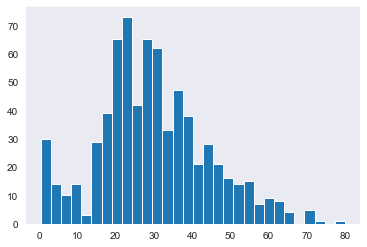

In [67]:
sns.set_style('dark')

data.Age.hist(bins = 30, grid = False)

In [37]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

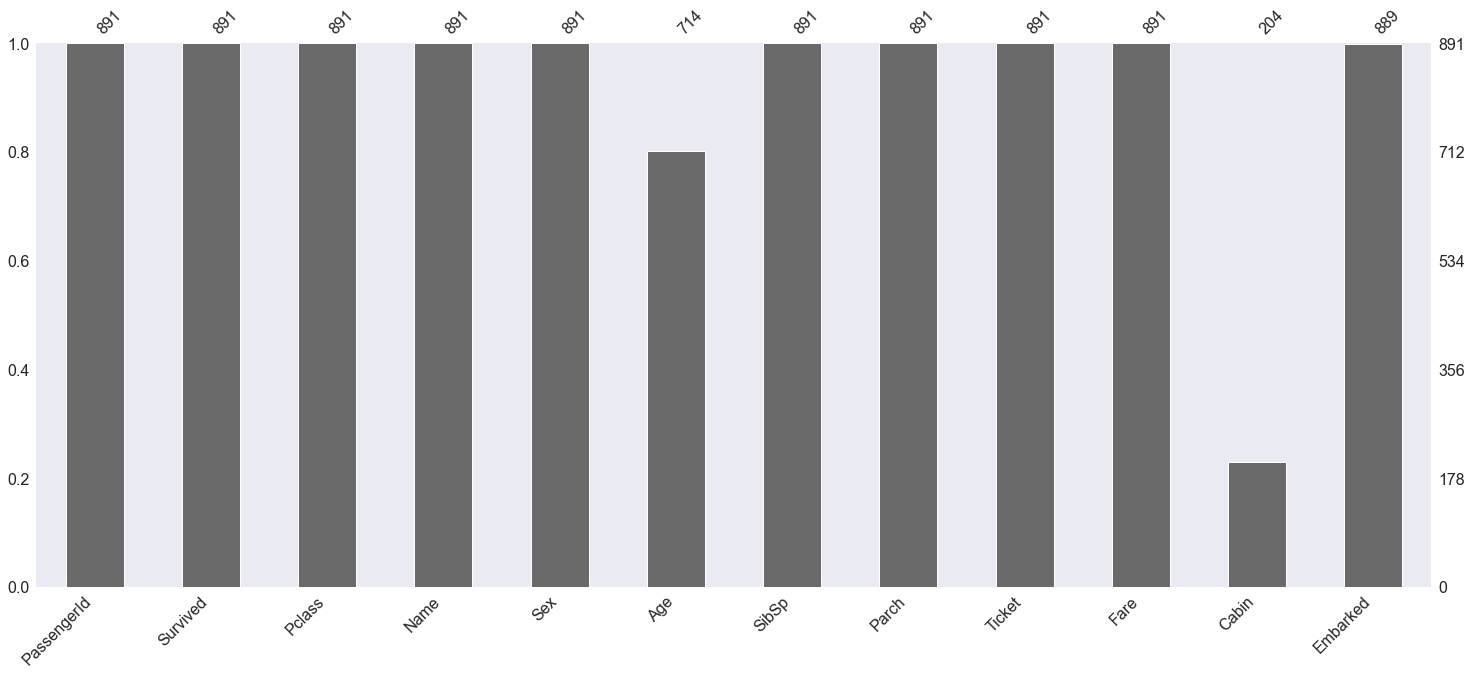

In [38]:
import missingno as msno
msno.bar(data)

<AxesSubplot:>

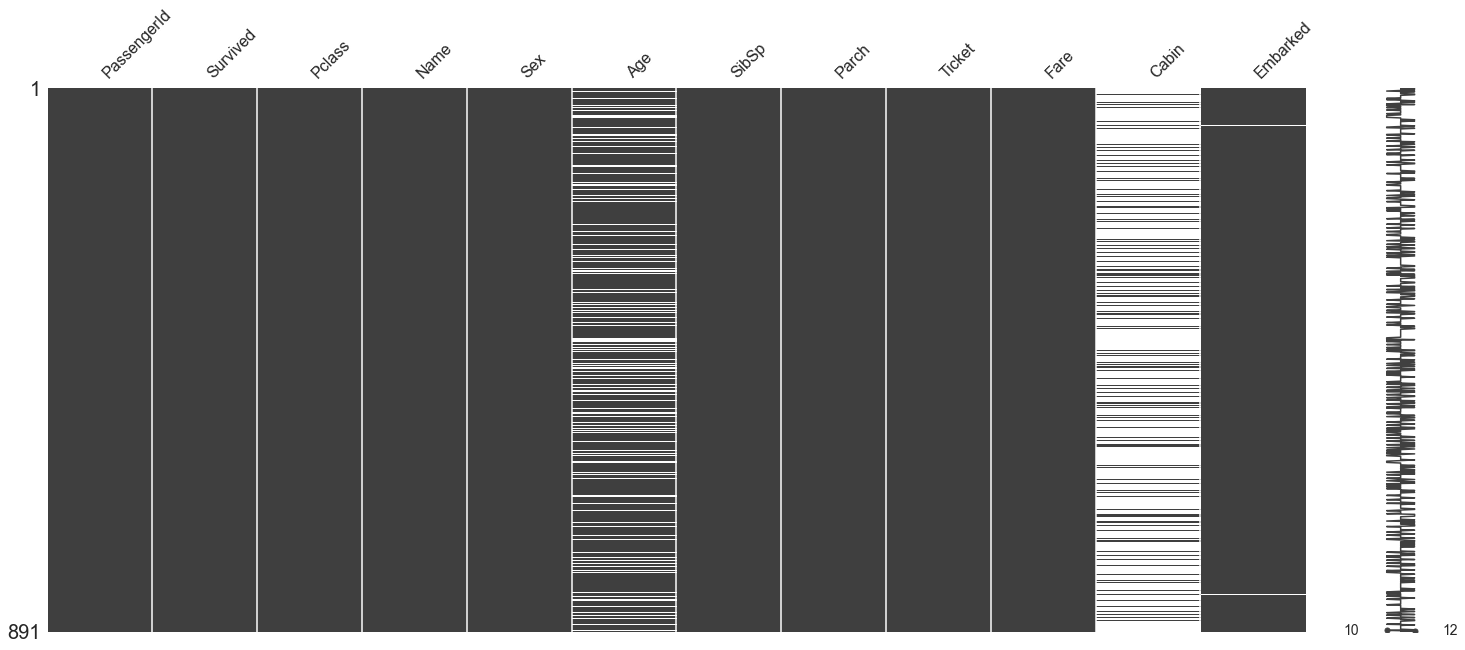

In [11]:
msno.matrix(data)

In [39]:
data.duplicated().sum()

0

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
import scipy.stats as spstats

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [69]:
age = np.array(data.Age)

# Remove Null values from the array
age_clean = age[~np.isnan(age)]

l, opt_lambda = spstats.boxcox(age_clean)

print('Optimal lambda values:', opt_lambda)

Optimal lambda values: 0.7627890912077443


Transforming data

In [71]:
data['age lambda 0'] = spstats.boxcox(
    data.Age,
    lmbda = 0
    
)

data['optimal lambda'] = spstats.boxcox(
    data.Age,
    lmbda = opt_lambda
)

In [72]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age lambda 0,optimal lambda
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.091042,12.543204
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.637586,19.709240
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.258097,14.426015
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.555348,18.431142
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.555348,18.431142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3.295837,14.885634
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2.944439,11.077410
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,3.258097,14.426015


<AxesSubplot:>

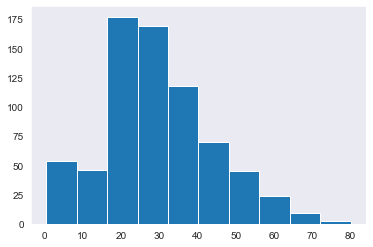

In [73]:
data.Age.hist(bins = 10, grid=False)

<AxesSubplot:>

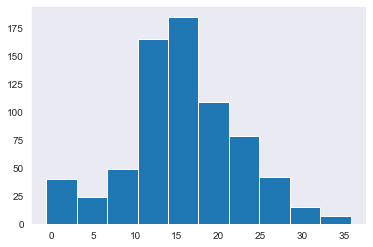

In [74]:
data['optimal lambda'].hist(bins =10, grid=False)

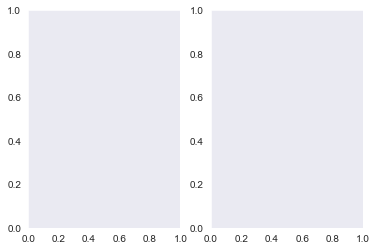

In [75]:
fig, (ax1,ax2) = plt.subplots(ncols=2)



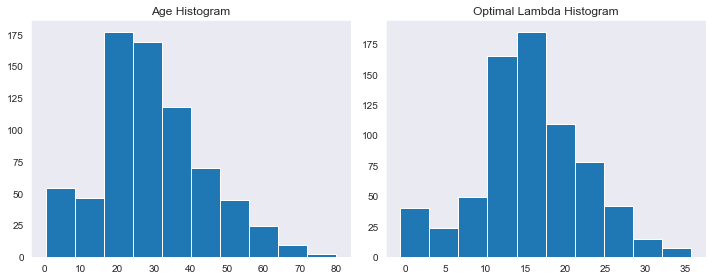

In [85]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

# Plot the histogram of data.Age on the first subplot
axs[0].hist(data.Age, bins=10)
axs[0].set_title('Age Histogram')

# Plot the histogram of data['optimal lambda'] on the second subplot
axs[1].hist(data['optimal lambda'], bins=10)
axs[1].set_title('Optimal Lambda Histogram')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

